In [ ]:
#Data analysis on customer segement

##total sales by ustomers based on LIFESTAGE and PREMIUM_CUSTOMER i.e which customer segment is contributing most to the chips sale


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv("QVI_data.csv")

In [5]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,WW,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [27]:
df.LIFESTAGE.unique()

array(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES',
       'OLDER FAMILIES', 'OLDER SINGLES/COUPLES', 'RETIREES',
       'YOUNG FAMILIES'], dtype=object)

                                        TOT_SALES
LIFESTAGE             PREMIUM_CUSTOMER           
OLDER FAMILIES        Budget            156863.75
YOUNG SINGLES/COUPLES Mainstream        147582.20
RETIREES              Mainstream        145168.95


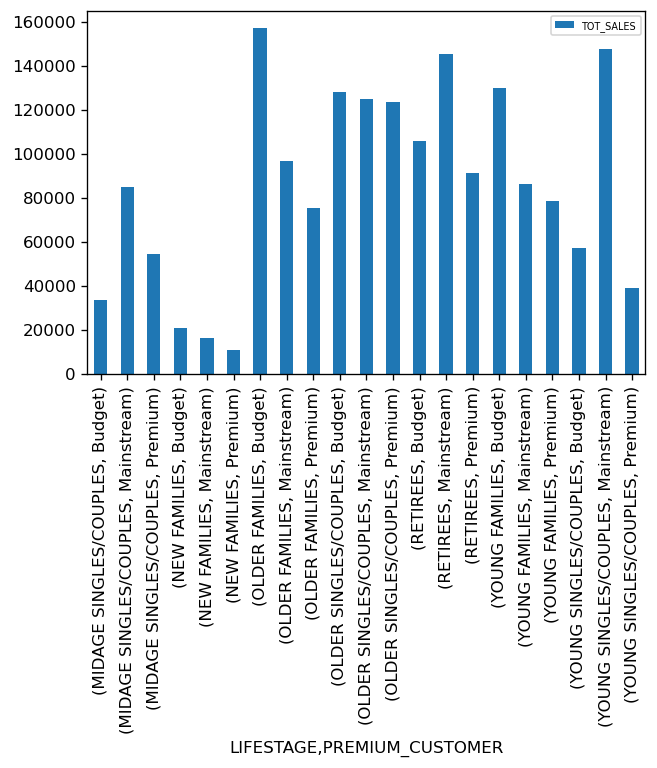

In [87]:
##total sales by ustomers based on LIFESTAGE and PREMIUM_CUSTOMER i.e which customer segment is contributing most to the chips sale

salesByLifestageAndPremium=df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'TOT_SALES':'sum'})
plt.rcParams['figure.dpi']=120
plt.rc('legend',fontsize="xx-small")
salesByLifestageAndPremium.plot(kind='bar',rot=90)
print(salesByLifestageAndPremium.nlargest(3,'TOT_SALES'))

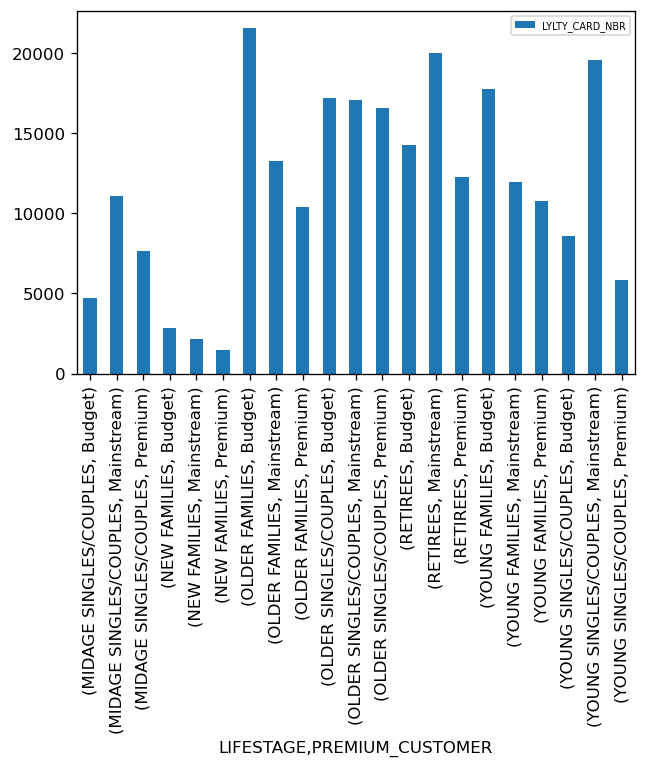

In [88]:
#### Number of customers by LIFESTAGE and PREMIUM_CUSTOMER

numCustomer=df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'LYLTY_CARD_NBR':'count'})
numCustomer
numCustomer.plot(kind='bar',rot=90)

In [99]:
unitsPerCustomer=df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER',]).agg({'PROD_QTY':'mean'}).sort_values('PROD_QTY',ascending=False)
unitsPerCustomer

PROD_QTY
LIFESTAGE              PREMIUM_CUSTOMER          
OLDER FAMILIES         Mainstream        1.948795
                       Premium           1.945496
                       Budget            1.945384
YOUNG FAMILIES         Mainstream        1.941408
                       Budget            1.941226
                       Premium           1.938149
OLDER SINGLES/COUPLES  Budget            1.914920
                       Premium           1.913949
MIDAGE SINGLES/COUPLES Mainstream        1.911942
OLDER SINGLES/COUPLES  Mainstream        1.911201
RETIREES               Premium           1.901438
MIDAGE SINGLES/COUPLES Budget            1.893626
RETIREES               Budget            1.893286
MIDAGE SINGLES/COUPLES Premium           1.891750
RETIREES               Mainstream        1.886680
NEW FAMILIES           Premium           1.860887
                       Mainstream        1.858124
                       Budget            1.855878
YOUNG SINGLES/COUPLES  Mainstream        1.853510
                       Budget            1.808002
                       Premium           1.807075

In [95]:
df[df.LYLTY_CARD_NBR==230078].sum()

DATE                2019-05-172018-07-182018-07-312018-09-262018-0...
STORE_NBR                                                        3910
LYLTY_CARD_NBR                                                3911326
TXN_ID                                                        3951218
PROD_NBR                                                          856
PROD_NAME           Pringles Chicken    Salt Crips 134gSmiths Crin...
PROD_QTY                                                           36
TOT_SALES                                                       138.6
PACK_SIZE                                                        2899
BRAND_NAME          PringlesSmithsRRDTostitosSmithsCobsInfuzionsSm...
LIFESTAGE           OLDER FAMILIESOLDER FAMILIESOLDER FAMILIESOLDE...
PREMIUM_CUSTOMER    BudgetBudgetBudgetBudgetBudgetBudgetBudgetBudg...
dtype: object